In [1]:
import geokit as gk

## Divide multipolygons along the antimeridian

In [2]:
# load the shape file of Fidji, a country spanning the antimeridian
FJI_df = gk.vector.extractFeatures(gk._test_data_["FJI.shp"])
FJI_geom = FJI_df.geom.iloc[0]

AxHands(ax=<Axes: >, handles=[[<matplotlib.patches.PathPatch object at 0x000002A8241C5EA0>, <matplotlib.patches.PathPatch object at 0x000002A8241C63E0>, <matplotlib.patches.PathPatch object at 0x000002A8241C65F0>, <matplotlib.patches.PathPatch object at 0x000002A8241C6800>, <matplotlib.patches.PathPatch object at 0x000002A8241C6A10>, <matplotlib.patches.PathPatch object at 0x000002A8241C6C20>, <matplotlib.patches.PathPatch object at 0x000002A8241C6E30>, <matplotlib.patches.PathPatch object at 0x000002A8241C7040>, <matplotlib.patches.PathPatch object at 0x000002A8241C7220>]], cbar=None)

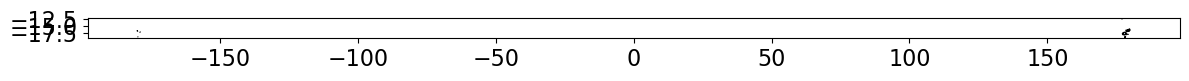

In [3]:
# FJI is split into two parts, one in the eastern hemisphere and one in the western hemisphere separated by the antimeridian
# in our example like mostly, the Western part has been shifted eastwards by 360 degrees
# that creates a problem when plotting the data or loading anything via the extent due to its huge extent of 360° longitude

# the test plot demonstrates the problem
gk.drawGeoms(FJI_geom)

In [4]:
# we can therefore extract each of the two parts separately
# demonstrate here for the part "right" of the antimeridian (i.e. East of antimeridian but West on the map)
FJI_right_geom = gk.geom.divideMultipolygonAtAntimeridian(geom=FJI_geom, side="right")
gk.drawGeoms(FJI_right_geom, figsize=(4,4))

# (side='left' would return the part West of the antimeridian, i.e. East on the map)
# (side='both' would return both parts as a tuple of 2 geometries)

AttributeError: module 'geokit.geom' has no attribute 'divideMultipolygonAtAntimeridian'

In [ ]:
# side='main' returns the side with the largest total polygon area
FJI_main_geom = gk.geom.divideMultipolygonAtAntimeridian(geom=FJI_geom, side="main")
gk.drawGeoms(FJI_main_geom, figsize=(4,4))

# we can see that in our case, it is the part "left" of the antimeridian that has the largest area

## Split and shift geometries along the antimeridian

In [ ]:
# assume we need to buffer the western (left) part of the country by 1°
FJI_main_geom_buffered = FJI_main_geom.Buffer(1)

# the buffered geometry now exceeds over the antimeridian
gk.drawGeoms(FJI_main_geom_buffered, figsize=(4,4))

In [ ]:
# envelope proves that we exceed 180° line
FJI_main_geom_buffered.GetEnvelope()

In [ ]:
# this causes potential trouble down the line, so we can split the buffered geometry again at the antimeridian
FJI_main_geom_buffered_splits = gk.geom.splitGeometryAlongAntimeridian(geom=FJI_main_geom_buffered, shiftouter=False, clip=False, verbose=True)

# we 
print(f"{len(FJI_main_geom_buffered_splits)} tuple entries, one for each side of the antimeridian including the center between -180 and 180.")
print(f"The left part is None since we do not have geometries < -180° in this example:")
print(FJI_main_geom_buffered_splits)

In [ ]:
# plot the other 2 parts, leaving out the None entry (cannot be plotted)
ax = gk.drawGeoms(FJI_main_geom_buffered_splits[1], fc="r", figsize=(4,4))  # left part in red
gk.drawGeoms(FJI_main_geom_buffered_splits[2], ax=ax, fc="b") # right part in blue

In [ ]:
# In this case, we might also just want to clip the irrelevant small section that extends over +180°
FJI_main_geom_buffered_clipped = gk.geom.splitGeometryAlongAntimeridian(geom=FJI_main_geom_buffered, shiftouter=False, clip=True, verbose=True)

# function returns only a single geom instance since the other parts were clipped
# plotting it shows the clipped boundary on the right side
gk.drawGeoms(FJI_main_geom_buffered_clipped, figsize=(4,4))

In [ ]:
# we could also move the right part, which exceeds our "standard window" of -180 to 180° longitude
# shifting it by 360° to the left would allow us to handle it all in the known -180 to +180° range which is handled well by most GIS software

# NOTE: This may not be a great idea for visualization, see above example
right_part = FJI_main_geom_buffered_splits[2]
right_part_shifted = gk.geom.shift(geom=right_part, lonShift=-360)

# plot the original left part and the shifted right part
ax = gk.drawGeoms(FJI_main_geom_buffered_splits[1], fc="r", ec=(1,1,1,0))  # left part in red
gk.drawGeoms(right_part_shifted, ax=ax, fc="b", ec=(1,1,1,0)) # right part in blue

In [ ]:
# This shift can also be achieved directly with the "shiftouter" argument
# It will shift the clipped part beyond the -180°/+180° line to the "other end" of the map
FJI_main_geoms_buffered_shifted = gk.geom.splitGeometryAlongAntimeridian(geom=FJI_main_geom_buffered, shiftouter=True, clip=False, verbose=True)

# show what we got - a tuple of 3 parts, the left is None (does not cross the -180° line on the left), center and the shifted right (now left part)
print(FJI_main_geoms_buffered_shifted)

# plot it - should look like above
ax = gk.drawGeoms(FJI_main_geoms_buffered_shifted[1], fc="r", ec=(1,1,1,0))  # left part in red
gk.drawGeoms(FJI_main_geoms_buffered_shifted[2], ax=ax, fc="b", ec=(1,1,1,0)) # right part in blue